### Import packages

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from dateutil.relativedelta import relativedelta

In [143]:
%matplotlib inline

### Load data

In [144]:
df_order = pd.read_csv('data/machine_learning_challenge_order_data.csv')
df_label = pd.read_csv('data/machine_learning_challenge_labeled_data.csv')

In [145]:
df_order.customer_id.value_counts()

15edce943edd    386
8745a335e9cf    288
d956116d863d    286
0063666607bb    273
ae60dce05485    270
               ... 
fc638c79abe0      1
ff77a25903d7      1
721ab0aac234      1
f430278dc060      1
9506ec7e4d11      1
Name: customer_id, Length: 245455, dtype: int64

In [146]:
df_label.customer_id.value_counts()

c6ce4eaaf4de    1
617b94b0ad19    1
37e1b31a6474    1
afc11be0047f    1
0af32e0c69f7    1
               ..
2587173d56c2    1
c78a71e36b9e    1
13791218e453    1
52e2f5efb6b0    1
ebbffe136d2a    1
Name: customer_id, Length: 245455, dtype: int64

In [147]:
# percentage of labeled customers in all orders
cus_order = set(df_order.customer_id.unique().tolist())
cus_label = set(df_label.customer_id.unique().tolist())
perc_labeled = len(cus_order.intersection(cus_label)) / len(cus_order.union(cus_label)) * 100
perc_labeled

100.0

In [148]:
len(cus_order)

245455

### Explore

In [149]:
df_order.head()

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
0,000097eabfd9,2015-06-20,19,1.0,0,0.0,0.000,11.46960,5803498,20326,1779,30231,4356
1,0000e2c6d9be,2016-01-29,20,1.0,0,0.0,0.000,9.55800,239303498,76547,1619,30359,4356
2,000133bb597f,2017-02-26,19,1.0,0,0.0,0.493,5.93658,206463498,33833,1619,30359,4324
3,00018269939b,2017-02-05,17,1.0,0,0.0,0.493,9.82350,36613498,99315,1619,30359,4356
4,0001a00468a6,2015-08-04,19,1.0,0,0.0,0.493,5.15070,225853498,16456,1619,29463,4356


In [150]:
df_order.dtypes

customer_id             object
order_date              object
order_hour               int64
customer_order_rank    float64
is_failed                int64
voucher_amount         float64
delivery_fee           float64
amount_paid            float64
restaurant_id            int64
city_id                  int64
payment_id               int64
platform_id              int64
transmission_id          int64
dtype: object

In [151]:
for c in df_order.columns:
    if '_id' in c:
        df_order[c] = df_order[c].apply(str)

In [152]:
df_order.describe(include='all')

,customer_id,order_date,order_hour,customer_order_rank,is_failed,voucher_amount,delivery_fee,amount_paid,restaurant_id,city_id,payment_id,platform_id,transmission_id
count,786600,786600,786600.000000,761833.000000,786600.000000,786600.000000,786600.00000,786600.000000,786600,786600,786600,786600,786600
unique,245455,776,NaN,NaN,NaN,NaN,NaN,NaN,13569,3749,5,14,10
top,15edce943edd,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,37623498,10346,1619,29463,4356
freq,386,4230,NaN,NaN,NaN,NaN,NaN,NaN,1317,86654,476600,241523,341734
mean,NaN,NaN,17.588796,9.436810,0.031486,0.091489,0.18118,10.183271,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.357192,17.772322,0.174628,0.479558,0.36971,5.618121,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,16.000000,1.000000,0.000000,0.000000,0.00000,6.648120,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,18.000000,3.000000,0.000000,0.000000,0.00000,9.027000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,20.000000,10.000000,0.000000,0.000000,0.00000,12.213000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

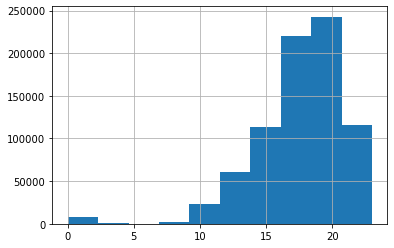

In [153]:
df_order.order_hour.hist()

<AxesSubplot:ylabel='Frequency'>

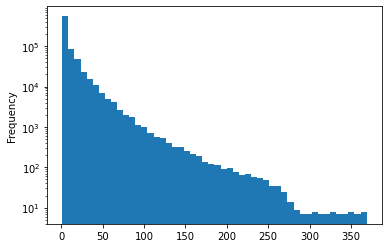

In [154]:
df_order.customer_order_rank.plot(kind='hist', bins=50, logy=True)
# check if frequency is strongly correlated to returning

In [155]:
res_prop = df_order.groupby('restaurant_id').agg({'amount_paid':['median', 'count']})
res_prop.columns = ['_'.join(col) for col in res_prop.columns.values]
res_prop

,amount_paid_median,amount_paid_count
restaurant_id,,
100053498,13.00950,7
100063498,8.38980,163
100073498,13.06260,170
100103498,7.38090,205
100163498,13.14225,34
...,...,...
99773498,15.77070,5
99803498,15.94593,3
99833498,9.71730,181


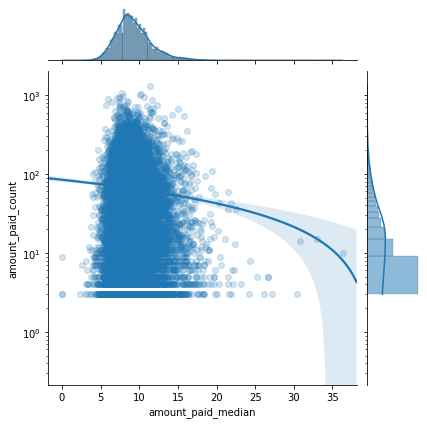

In [156]:
g = sns.jointplot(x="amount_paid_median", y="amount_paid_count", data=res_prop[res_prop.amount_paid_count>=3],
                  kind="reg", truncate=False,
                  joint_kws = {'scatter_kws':dict(alpha=0.2)})
g.ax_joint.set_yscale('log')

In [157]:
# sns.pairplot(df_order[['order_hour', 'customer_order_rank', 'is_failed', 'voucher_amount', 
#                        'delivery_fee', 'amount_paid']].sample(frac=0.1, random_state=12), 
#              plot_kws={'alpha':0.1})

<AxesSubplot:title={'center':'Order trend'}, xlabel='order_date'>

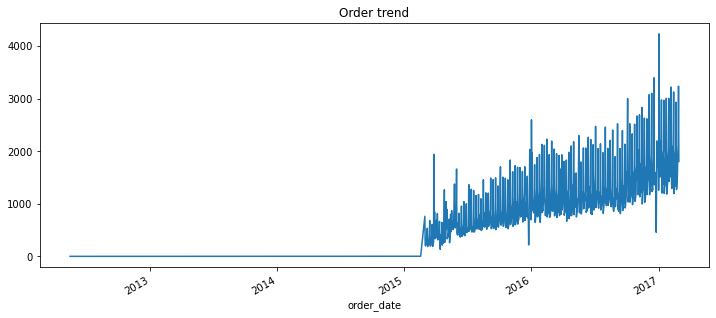

In [158]:
dfs = df_order.groupby('order_date')['customer_id'].count()
dfs.index = pd.to_datetime(dfs.index)
dfs.plot(title='Order trend', figsize=(12,5))

In [159]:
dfs[dfs > 1].sort_index().head(10)

order_date
2013-10-31      2
2014-05-11      2
2014-12-28      2
2015-02-06      3
2015-02-17      3
2015-03-01    762
2015-03-02    221
2015-03-03    199
2015-03-04    228
2015-03-05    228
Name: customer_id, dtype: int64

It seems like we can safetly remove the minor transactions before 2015-03-01 and keep the rest of transactions.

In [160]:
df_order = df_order[df_order.order_date >= '2015-03-01'].reset_index(drop=True)
df_order.shape

(786547, 13)

Now we look at the `df_label` dataframe.

In [161]:
df_label.head()

,customer_id,is_returning_customer
0,000097eabfd9,0
1,0000e2c6d9be,0
2,000133bb597f,1
3,00018269939b,0
4,0001a00468a6,0


In [162]:
df_label.is_returning_customer.value_counts()

0    189948
1     55507
Name: is_returning_customer, dtype: int64

### Feature Engineering

Derivation of the following features can be done

- Transaction patterns (FRM): frequency (amount of orders completed per month in the last 12 months, per week in the last 12 weeks), recency (number of days since last order, latest customer_order_rank), monetary (median and total of voucher_amount/delivery_fee/amount_paid in the past)
- Transaction behaviors (weekday preference in terms of %)
- Restaurant orientations (variety of ordered restaurants)

In [163]:
df_order.order_date.min(), df_order.order_date.max()

('2015-03-01', '2017-02-27')

In [164]:
df_order.is_failed.value_counts()

0    761786
1     24761
Name: is_failed, dtype: int64

In [165]:
months = sorted(df_order.order_date.apply(lambda s: s[0:7]).unique().tolist())

In [166]:
i = len(months) - 1
cur = months[i]
start = months[i-23]
df = df_order[df_order.order_date > start].reset_index(drop=True)
df.shape, len(df.customer_id.unique())

((786547, 13), 245453)

#### 1. Transaction patterns

In [167]:
df['year_month'] = df.order_date.apply(lambda x: x[0:7])
df['week_in_month'] = df.order_date.apply(lambda x: 
    'W1' if x[8:10] <= '07' 
    else('W2' if x[8:10] <= '14' 
    else ('W3' if x[8:10] <= '21' 
    else 'W4')))
df['weekday'] = pd.to_datetime(df.order_date).apply(lambda x: calendar.day_name[x.weekday()])

Since most of the months have more than 28 days, it is expected to see Week 4 (W4) to have more transactions.

In [168]:
df['year_month'].value_counts().sort_index(), df.week_in_month.value_counts(), df.weekday.value_counts()

(2015-03    12379
 2015-04    13256
 2015-05    20195
 2015-06    15964
 2015-07    19668
 2015-08    22130
 2015-09    22785
 2015-10    25970
 2015-11    28211
 2015-12    29375
 2016-01    35983
 2016-02    32861
 2016-03    34512
 2016-04    33158
 2016-05    35976
 2016-06    35764
 2016-07    39026
 2016-08    37124
 2016-09    37641
 2016-10    47610
 2016-11    47129
 2016-12    52190
 2017-01    57021
 2017-02    50619
 Name: year_month, dtype: int64, W4    246470
 W1    188154
 W3    178389
 W2    173534
 Name: week_in_month, dtype: int64, Sunday       196575
 Saturday     119876
 Friday       118636
 Thursday      91250
 Monday        88390
 Wednesday     86326
 Tuesday       85494
 Name: weekday, dtype: int64)

It is no surprise that customers tend to order more on Friday, Saturday and especially Sunday.

In [169]:
month_dict = {months[j]:'M-'+str(i-j+1) for j in range(i-23, i+1)}
month_dict

{'2015-03': 'M-24',
 '2015-04': 'M-23',
 '2015-05': 'M-22',
 '2015-06': 'M-21',
 '2015-07': 'M-20',
 '2015-08': 'M-19',
 '2015-09': 'M-18',
 '2015-10': 'M-17',
 '2015-11': 'M-16',
 '2015-12': 'M-15',
 '2016-01': 'M-14',
 '2016-02': 'M-13',
 '2016-03': 'M-12',
 '2016-04': 'M-11',
 '2016-05': 'M-10',
 '2016-06': 'M-9',
 '2016-07': 'M-8',
 '2016-08': 'M-7',
 '2016-09': 'M-6',
 '2016-10': 'M-5',
 '2016-11': 'M-4',
 '2016-12': 'M-3',
 '2017-01': 'M-2',
 '2017-02': 'M-1'}

In [170]:
# Frequency at month level
df['is_succeeded'] = df.is_failed.apply(lambda x: 1-x)

df_freq_m = df.groupby(['customer_id', 'year_month'])['is_succeeded']\
    .agg('sum').reset_index(name='numOfOrders')
# df_freq_m['year_month'] = df_freq_m.year_month.apply(lambda s: month_dict[s]) 
# df_freq_m = pd.pivot_table(df_freq_m, index=['customer_id'], columns=['year_month'], 
#         values=['numOfOrders'], aggfunc=np.mean)
# df_freq_m.columns = ['_'.join(col) for col in df_freq_m.columns.values]
# df_freq_m = df_freq_m.reset_index().fillna(0)
df_freq_m

,customer_id,year_month,numOfOrders
0,000097eabfd9,2015-06,1
1,0000e2c6d9be,2016-01,1
2,000133bb597f,2017-02,1
3,00018269939b,2017-02,1
4,0001a00468a6,2015-08,1
...,...,...,...
511711,fffe9d5a8d41,2016-09,1
511712,ffff347c3cfa,2016-08,1
511713,ffff347c3cfa,2016-09,1
511714,ffff4519b52d,2016-04,1


In [190]:
df_freq_m.to_csv('processed_data/df_freq_m.csv', index=False)

In [171]:
# Frequency at week level for last 12 weeks
# df['year_month_week'] = df.year_month.apply(lambda s: month_dict[s])  + '_' + df.week_in_month
# df_freq_w = df.groupby(['customer_id', 'year_month_week'])['is_succeeded']\
#     .agg('sum').reset_index(name='numOfOrders')
# df_freq_w = pd.pivot_table(df_freq_w, index=['customer_id'], columns=['year_month_week'], 
#         values=['numOfOrders'], aggfunc=np.mean)
# df_freq_w.columns = ['_'.join(col) for col in df_freq_w.columns.values]
# df_freq_w = df_freq_w.reset_index().fillna(0)
# weeks_in_last_3months = [s for s in df_freq_w.columns if ('M-1_' in s) or ('M-2_' in s) or ('M-3_' in s)]
# df_freq_w = df_freq_w[['customer_id'] + weeks_in_last_3months]
# df_freq_w

In [172]:
# Recency
current_date = pd.to_datetime(cur) + relativedelta(months=1)
maxday_gap = 365

df_rcc = (df[['customer_id', 'is_failed', 'order_date']]
    .sort_values(['customer_id', 'is_failed', 'order_date'], ascending=True)
    .drop_duplicates(['customer_id', 'is_failed'], keep='last'))
df_rcc['is_failed'] = df_rcc.is_failed.apply(lambda x: 'failed' if x==1 else 'succeeded')
df_rcc['last_order_in_days'] = df_rcc.order_date.apply(lambda d:
    (current_date - pd.to_datetime(d)).days)
df_rcc = pd.pivot_table(df_rcc, index=['customer_id'], columns=['is_failed'], 
        values=['last_order_in_days'], aggfunc=np.mean)
df_rcc.columns = ['_'.join(col) for col in df_rcc.columns.values]
df_rcc = df_rcc.reset_index()
df_rcc.fillna(value=maxday_gap, inplace=True)
df_rcc

,customer_id,last_order_in_days_failed,last_order_in_days_succeeded
0,000097eabfd9,365.0,620.0
1,0000e2c6d9be,365.0,397.0
2,000133bb597f,365.0,3.0
3,00018269939b,365.0,24.0
4,0001a00468a6,365.0,575.0
...,...,...,...
245448,fffd696eaedd,365.0,534.0
245449,fffe9d5a8d41,152.0,152.0
245450,ffff347c3cfa,365.0,167.0
245451,ffff4519b52d,365.0,333.0


In [191]:
df_rcc.to_csv('processed_data/df_rcc.csv', index=False)

In [173]:
# Monetary
df_money = df.groupby('customer_id')[['voucher_amount', 'delivery_fee', 'amount_paid']]\
    .agg(['sum','median']).reset_index()
df_money.columns = ['_'.join(col) for col in df_money.columns.values]
df_money

,customer_id_,voucher_amount_sum,voucher_amount_median,delivery_fee_sum,delivery_fee_median,amount_paid_sum,amount_paid_median
0,000097eabfd9,0.0,0.0,0.0000,0.0000,11.46960,11.46960
1,0000e2c6d9be,0.0,0.0,0.0000,0.0000,9.55800,9.55800
2,000133bb597f,0.0,0.0,0.4930,0.4930,5.93658,5.93658
3,00018269939b,0.0,0.0,0.4930,0.4930,9.82350,9.82350
4,0001a00468a6,0.0,0.0,0.4930,0.4930,5.15070,5.15070
...,...,...,...,...,...,...,...
245448,fffd696eaedd,0.0,0.0,1.4297,1.4297,24.13395,24.13395
245449,fffe9d5a8d41,0.0,0.0,0.0000,0.0000,29.89530,10.72620
245450,ffff347c3cfa,0.0,0.0,0.0000,0.0000,13.54050,6.77025
245451,ffff4519b52d,0.0,0.0,0.0000,0.0000,21.77100,21.77100


In [192]:
df_money.to_csv('processed_data/df_money.csv', index=False)

In [174]:
# Misc: Loyalty, Total failed transactions
df_misc = df.groupby('customer_id').agg({
    'customer_order_rank': 'max',
    'is_failed': 'sum',
    'is_succeeded': 'sum'
})
df_misc.rename(columns={'is_failed':'is_failed_sum',
                       'is_succeeded':'is_succeeded_sum'}, inplace=True)
df_misc

,customer_order_rank,is_failed_sum,is_succeeded_sum
customer_id,,,
000097eabfd9,1.0,0,1
0000e2c6d9be,1.0,0,1
000133bb597f,1.0,0,1
00018269939b,1.0,0,1
0001a00468a6,1.0,0,1
...,...,...,...
fffd696eaedd,1.0,0,1
fffe9d5a8d41,1.0,2,1
ffff347c3cfa,2.0,0,2


In [193]:
df_misc.to_csv('processed_data/df_misc.csv', index=False)

#### 2. Transaction behaviors (weekday preference in terms of %)

In [185]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_weekday = df.groupby('customer_id')['weekday'].value_counts(normalize=True)
df_weekday = df_weekday.reset_index(name='perc')
df_weekday = pd.pivot_table(df_weekday, index=['customer_id'], columns=['weekday'], 
        values=['perc'], aggfunc=np.mean)
df_weekday.columns = [col[-1] for col in df_weekday.columns.values]
df_weekday.fillna(0, inplace=True)

df_weekday = df_weekday[weekdays]
df_weekday

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
customer_id,,,,,,,
000097eabfd9,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000
0000e2c6d9be,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000
000133bb597f,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000
00018269939b,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000
0001a00468a6,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...
fffd696eaedd,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000
fffe9d5a8d41,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333
ffff347c3cfa,0.0,0.0,0.5,0.5,0.000000,0.0,0.000000


In [194]:
df_weekday.to_csv('processed_data/df_weekday.csv', index=False)

In [186]:
# weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


# def weekday_dist(g):
#     weekday_cnt = g.weekday.value_counts() / len(g) * 100
#     weekday_cnt = weekday_cnt.to_dict()
#     for d in weekdays:
#         weekday_cnt[d] = weekday_cnt.get(d, 0.0)
    
#     return pd.Series(weekday_cnt, index=weekdays)

# df_weekday = df.groupby(['customer_id'])[['weekday']].apply(weekday_dist)
# df_weekday

#### 3. Restaurant orientations (variety of ordered restaurants)

For each customer, this is computed as the percentage of the most ordered restaurant in all of his/her orders. For example, it is `1.0` if a customer ordered only once.

In [187]:
# df_res = df[df.is_failed==0].groupby(['customer_id', 'restaurant_id']).size().reset_index(name='counts')
df_res = df.groupby('customer_id')['restaurant_id'].value_counts(normalize=True)
df_res = df_res.reset_index(name='top_restaurant_perc').drop('restaurant_id', axis='columns')
df_res.groupby('customer_id').first()
df_rec

,customer_id,top_restaurant_perc
0,000097eabfd9,1.000000
1,0000e2c6d9be,1.000000
2,000133bb597f,1.000000
3,00018269939b,1.000000
4,0001a00468a6,1.000000
...,...,...
432174,fffe9d5a8d41,0.333333
432175,ffff347c3cfa,0.500000
432176,ffff347c3cfa,0.500000
432177,ffff4519b52d,1.000000


In [188]:
len(df_rec.customer_id.unique())

245453

### Problem Formulation

#### 1. A Simple Model on Feb 2017

We are going to use features derived in one year (2016-03 to 2017-02) to train and predict if a customer comes back within 6 months. The reason for *one year (12 months)* period is that holidays reoccur yearly, so customers might order again if they order last year; that's the longest time factor that can drive reodering.

In [34]:
df_order_sample = df_order[df_order.order_date >= '2016-03-01'].reset_index()
df_order_sample.shape

(507770, 14)

In [70]:
np.median([1])

1.0

In [ ]:
### Problem Design and Train-Test Splitting
df_order.order_date.min(), df_order.order_date.max()